In [2]:
!pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00


In [3]:
import torch
import torchvision
import captum
import matplotlib
import numpy as np

In [4]:
from torchvision.models import resnet50, ResNet50_Weights
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model.eval();

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 67.1MB/s]


In [5]:
preprocess_func = ResNet50_Weights.IMAGENET1K_V2.transforms()
preprocess_func

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [6]:
categories = np.array(ResNet50_Weights.IMAGENET1K_V2.meta["categories"])
len(categories), categories[:5]

(1000,
 array(['tench', 'goldfish', 'great white shark', 'tiger shark',
        'hammerhead'], dtype='<U30'))

In [7]:
from PIL import Image
shark = Image.open("/content/shark.jpg")
shark.size

(640, 475)

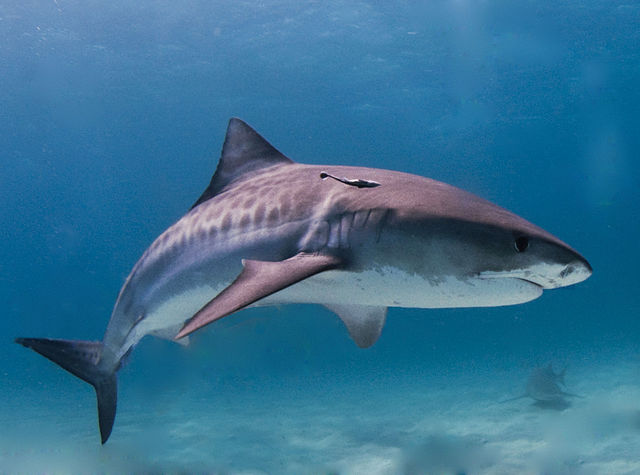

In [8]:
shark

In [9]:
processed_img = preprocess_func(shark)
processed_img.shape

torch.Size([3, 224, 224])

In [10]:
probs = model(processed_img.unsqueeze(0))
probs = probs.softmax(1)
probs = probs[0].detach().numpy()

In [11]:
prob = probs[probs.argsort()[-5:][::-1]]
idxs = probs.argsort()[-5:][::-1]
prob, idxs

(array([0.53391576, 0.00302059, 0.00298607, 0.00283408, 0.00244832],
       dtype=float32),
 array([  3,   2,   4,  13, 814]))

In [12]:
categories[idxs]

array(['tiger shark', 'great white shark', 'hammerhead', 'junco',
       'speedboat'], dtype='<U30')

In [13]:
from captum.attr import IntegratedGradients
interpretation_algo = IntegratedGradients(model)

In [14]:
feature_imp = interpretation_algo.attribute(processed_img.unsqueeze(0), target=3)
feature_imp.shape

torch.Size([1, 3, 224, 224])

In [15]:
feature_imp = feature_imp[0].numpy()
feature_imp = feature_imp.transpose(1,2,0)
feature_imp.shape

(224, 224, 3)

In [16]:
processed_img_np = processed_img.numpy().transpose(1,2,0)
processed_img_np.shape

(224, 224, 3)

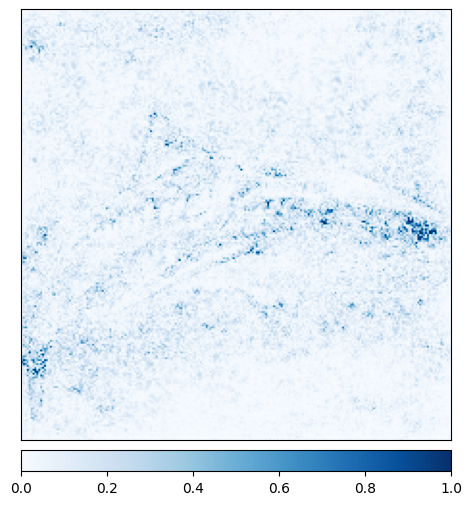

In [17]:
from captum.attr import visualization as viz
fig, ax = viz.visualize_image_attr(feature_imp, show_colorbar=True, fig_size=(6,6));

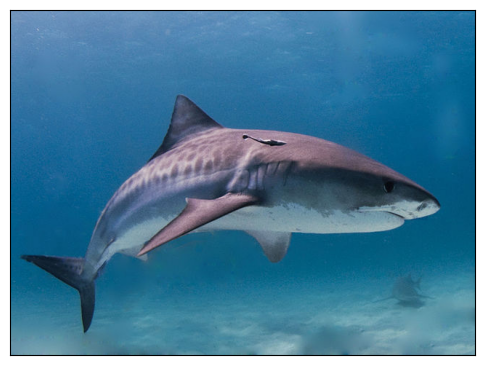

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

plt.imshow(shark);
plt.xticks([],[]);
plt.yticks([],[]);